In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 24}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 300
sns.set_theme()

In [3]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')


--2023-12-15 06:55:09--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2023-12-15 06:55:10--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.009s  

2023-12-15 06:55:10 (10.5 MB/s) - ‘t

In [4]:
import pandas as pd

ann_main = pd.read_csv("/content/drive/MyDrive/Semester/Spring2023/HumanEvaluationATS/data+code/final/all-ann-final-model-paper.csv", index_col=0).reset_index()

In [5]:
ann_main.columns

Index(['article_id', 'title', 'paragraph', 'model_name', 'answer_1',
       'answer_2', 'answer_3', 'comments', 'question_1', 'question_2',
       'question_3', 'non_answer', 'correct_answer_1', 'correct_answer_2',
       'correct_answer_3', 'correct_count', 'is_correct_answer_1',
       'is_correct_answer_2', 'is_correct_answer_3', 'non_answer_1',
       'non_answer_2', 'non_answer_3', 'all_options_1', 'all_options_2',
       'all_options_3', 'para_id', 'Model'],
      dtype='object')

In [6]:
ann_main.head()

,article_id,title,paragraph,model_name,answer_1,answer_2,answer_3,comments,question_1,question_2,...,is_correct_answer_2,is_correct_answer_3,non_answer_1,non_answer_2,non_answer_3,all_options_1,all_options_2,all_options_3,para_id,Model
0,26,Wealth Therapy for the Rich,Clay Cockrell is sitting in his office at Colu...,control-editnar-grade5,In his office opposite the Trump International...,Wall Street worker,Trump International Hotel and Tower,\n,Where does Clay Cockrell hold his popular ther...,What was Cockrell’s occupation before taking o...,...,True,True,False,False,False,['At a park near the Trump International Hotel...,"['Wall Street worker', 'Therapist', 'Manager a...","['Trump International Hotel and Tower', 'Centr...",1,EditCL-Grade5
1,5,Bright Future for Astrotourism,"On Black Fell, looking down on Northumberland'...",t5_base_wiki_output_turk,A car park,People who applied for a night of stargazing a...,Observe Jupiter and Venus,\n,What is located next to the Kielder Observatory?,Who mentions that it might be possible to see ...,...,False,True,False,False,False,"['A car park', 'A wooden building', 'Capella a...",['Members of a team of astronomers at Kielder ...,"['Observe Jupiter and Venus', 'Observe the nor...",1,ControlT5-Wiki
2,15,Man Falls Just Short in Patriot Game to be 100...,Benjamin Carle is made in France. This is righ...,t5_base_wiki_output_turk,They are not made in France,Trying not to use products manufactured outsid...,He asked people to buy products made in France,\n,What is true of Carle’s Ikea forks?,What was the main premise of Carle’s televisio...,...,True,True,False,False,False,"['They are not made in France', 'They are 96.9...",['Trying not to use products manufactured outs...,['He asked people to buy products made in Fran...,1,ControlT5-Wiki
3,19,Philip Pullman Illegal Downloading Is Moral Sq...,"Illegal downloading is a kind of ""moral squalo...",muss_bart_unsup_out,The “Society of Authors”,He disapproves of people who are OK with pirating,People who think it’s alright to download book...,\n,Where does Philip Pullman hold a senior position?,What does Pullman think about pirating?,...,True,True,False,False,False,"['The “Society of Authors”', 'The “Index on Ce...",['He disapproves of people who are OK with pir...,['People who think it’s alright to download bo...,1,MUSS-Unsup
4,8,Google Introduces its Driverless Car,They iling a car with a top speed of 25mph. It...,control-editnar-grade5,The question or the answer options are not sup...,It tells the car where the user wants to go,It has fewer controls compared to a typical car,\n,What kind of reaction did Google’s new driverl...,How does the car passenger’s phone interact wi...,...,True,True,True,False,False,"['It drew strong attention from the industry',...",['It tells the car where the user wants to go'...,['It has fewer controls compared to a typical ...,1,EditCL-Grade5


In [7]:
ann_main.Model.unique()

array(['EditCL-Grade5', 'ControlT5-Wiki', 'MUSS-Unsup', 'Original',
       'ControlSup-Grade5', 'ChatGPT', 'MUSS-SUP', 'Elementary', 'KIS',
       'ControlSup-Grade7', 'EditCL-Grade7'], dtype=object)

In [8]:
# flatten the dataframe across questions
import ast
all_datapoints = []
for group_name, df_sampled in ann_main.groupby(['Model']):
    for row_index, row in df_sampled.iterrows():
      for i in range(1, 4):
        all_options = ast.literal_eval(row[f'all_options_{i}']) + ["The question or the answer options are not supported by the passage."]
        all_datapoints.append([group_name, f"{row['article_id']}_p{row['para_id']}_q{i}", row['paragraph'], row[f'question_{i}'], row[f'answer_{i}'].strip(), all_options.index(row[f'answer_{i}'].strip()), all_options])


all_datapoints_df = pd.DataFrame(all_datapoints)
all_datapoints_df.columns= ("Model", "item_ids", "paragraph", "question", "answer", "selected", "all_options")

all_datapoints_df["article-para"] = all_datapoints_df["item_ids"].apply(lambda x: ("_").join(x.split("_")[:2]))

<ipython-input-8-6a8425161423>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, df_sampled in ann_main.groupby(['Model']):


In [9]:
def get_simplified(item):
  return all_datapoints_df[(all_datapoints_df.item_ids == item) & (all_datapoints_df.Model == "Elementary") ]["paragraph"].tolist()[0]

all_datapoints_df["simplified"] = all_datapoints_df["item_ids"].apply(get_simplified)

In [10]:
def get_original(item):
  return all_datapoints_df[(all_datapoints_df.item_ids == item) & (all_datapoints_df.Model == "Original") ]["paragraph"].tolist()[0]

all_datapoints_df["original"] = all_datapoints_df["item_ids"].apply(get_original)

# Overall Ranking

In [15]:
df1_grouped = all_datapoints_df.groupby(['Model'])

scores = []
for group_name, df_group in df1_grouped:
  scores.append((group_name, len(df_group[df_group['selected']==0]) / (len(df_group)) *100 , len(df_group[df_group['selected']==1]) / (len(df_group)) *100 ,len(df_group[df_group['selected']==2]) / (len(df_group)) *100 ,len(df_group[df_group['selected']==3]) / (len(df_group)) *100 ,len(df_group[df_group['selected']==4]) / (len(df_group)) *100 ))

scores_df = pd.DataFrame(scores)
scores_df.columns= ("Model", "% Correct", "B", "C", "D", "E")
print(scores_df.sort_values("% Correct", ascending=False))
print("\n\n")

                Model  % Correct          B         C         D          E
10           Original  78.333333   6.111111  2.222222  1.111111  12.222222
6          Elementary  77.222222   5.555556  2.777778  0.000000  14.444444
8            MUSS-SUP  76.111111   6.666667  1.666667  1.666667  13.888889
0             ChatGPT  74.444444   9.444444  1.111111  0.000000  15.000000
3      ControlT5-Wiki  74.444444   6.111111  2.777778  1.666667  15.000000
9          MUSS-Unsup  73.333333   6.666667  2.777778  1.111111  16.111111
2   ControlSup-Grade7  70.555556   3.888889  2.777778  2.777778  20.000000
5       EditCL-Grade7  70.000000  10.555556  2.222222  0.555556  16.666667
4       EditCL-Grade5  69.444444  10.000000  2.222222  0.000000  18.333333
1   ControlSup-Grade5  67.777778  11.111111  3.888889  0.000000  17.222222
7                 KIS  20.555556   7.222222  3.888889  3.888889  64.444444





<ipython-input-15-f84dc1db7347>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, df_group in df1_grouped:


# Subsampling Analysis

In [ ]:
import random
ann_main["item_id"] =  ann_main.apply(lambda x: f"{x.article_id}_p{x.para_id}", axis=1)

all_item_ids = ann_main["item_id"].unique().tolist()
scores = []
subset_sizes =  [5, 10, 20, 30, 40, 50, 60]
for sub_k in subset_sizes:
  for n in range(50):
    random.shuffle(all_item_ids)
    for group_name, df_group in ann_main.groupby(['Model']):
      sub_item_ids = all_item_ids[:sub_k]
      df_group_sub = df_group[df_group.item_id.isin(sub_item_ids)]
      scores.append((sub_k, n, group_name, sum(df_group_sub['correct_count']) / (len(df_group_sub)*3) *100))
scores_df = pd.DataFrame(scores)
scores_df.columns= ("k", "n", "Model_name", "% Correct")

In [30]:
model_names = list(scores_df.Model_name.unique())
rank = lambda arr: list(map(lambda i: sorted(arr, reverse=True).index(i)+1, arr))

rankings = {}

for sub_k in subset_sizes:
  ordered_rank_subk = rank([scores_df[(scores_df.k==sub_k) & (scores_df.Model_name==x)]["% Correct"].mean() for x in model_names])
  rankings[sub_k] = {model_names[i]: ordered_rank_subk[i] for i in range(len(ordered_rank_subk))}

new_ranking_list = []
for model_name in model_names:
  new_ranking_list.append({
      'Name': [model_name]*len(rankings),
      'Subset Size': subset_sizes,
      'Rank': [rankings[t][model_name] for t in subset_sizes]
  })

Text(0, 0.5, 'Order')

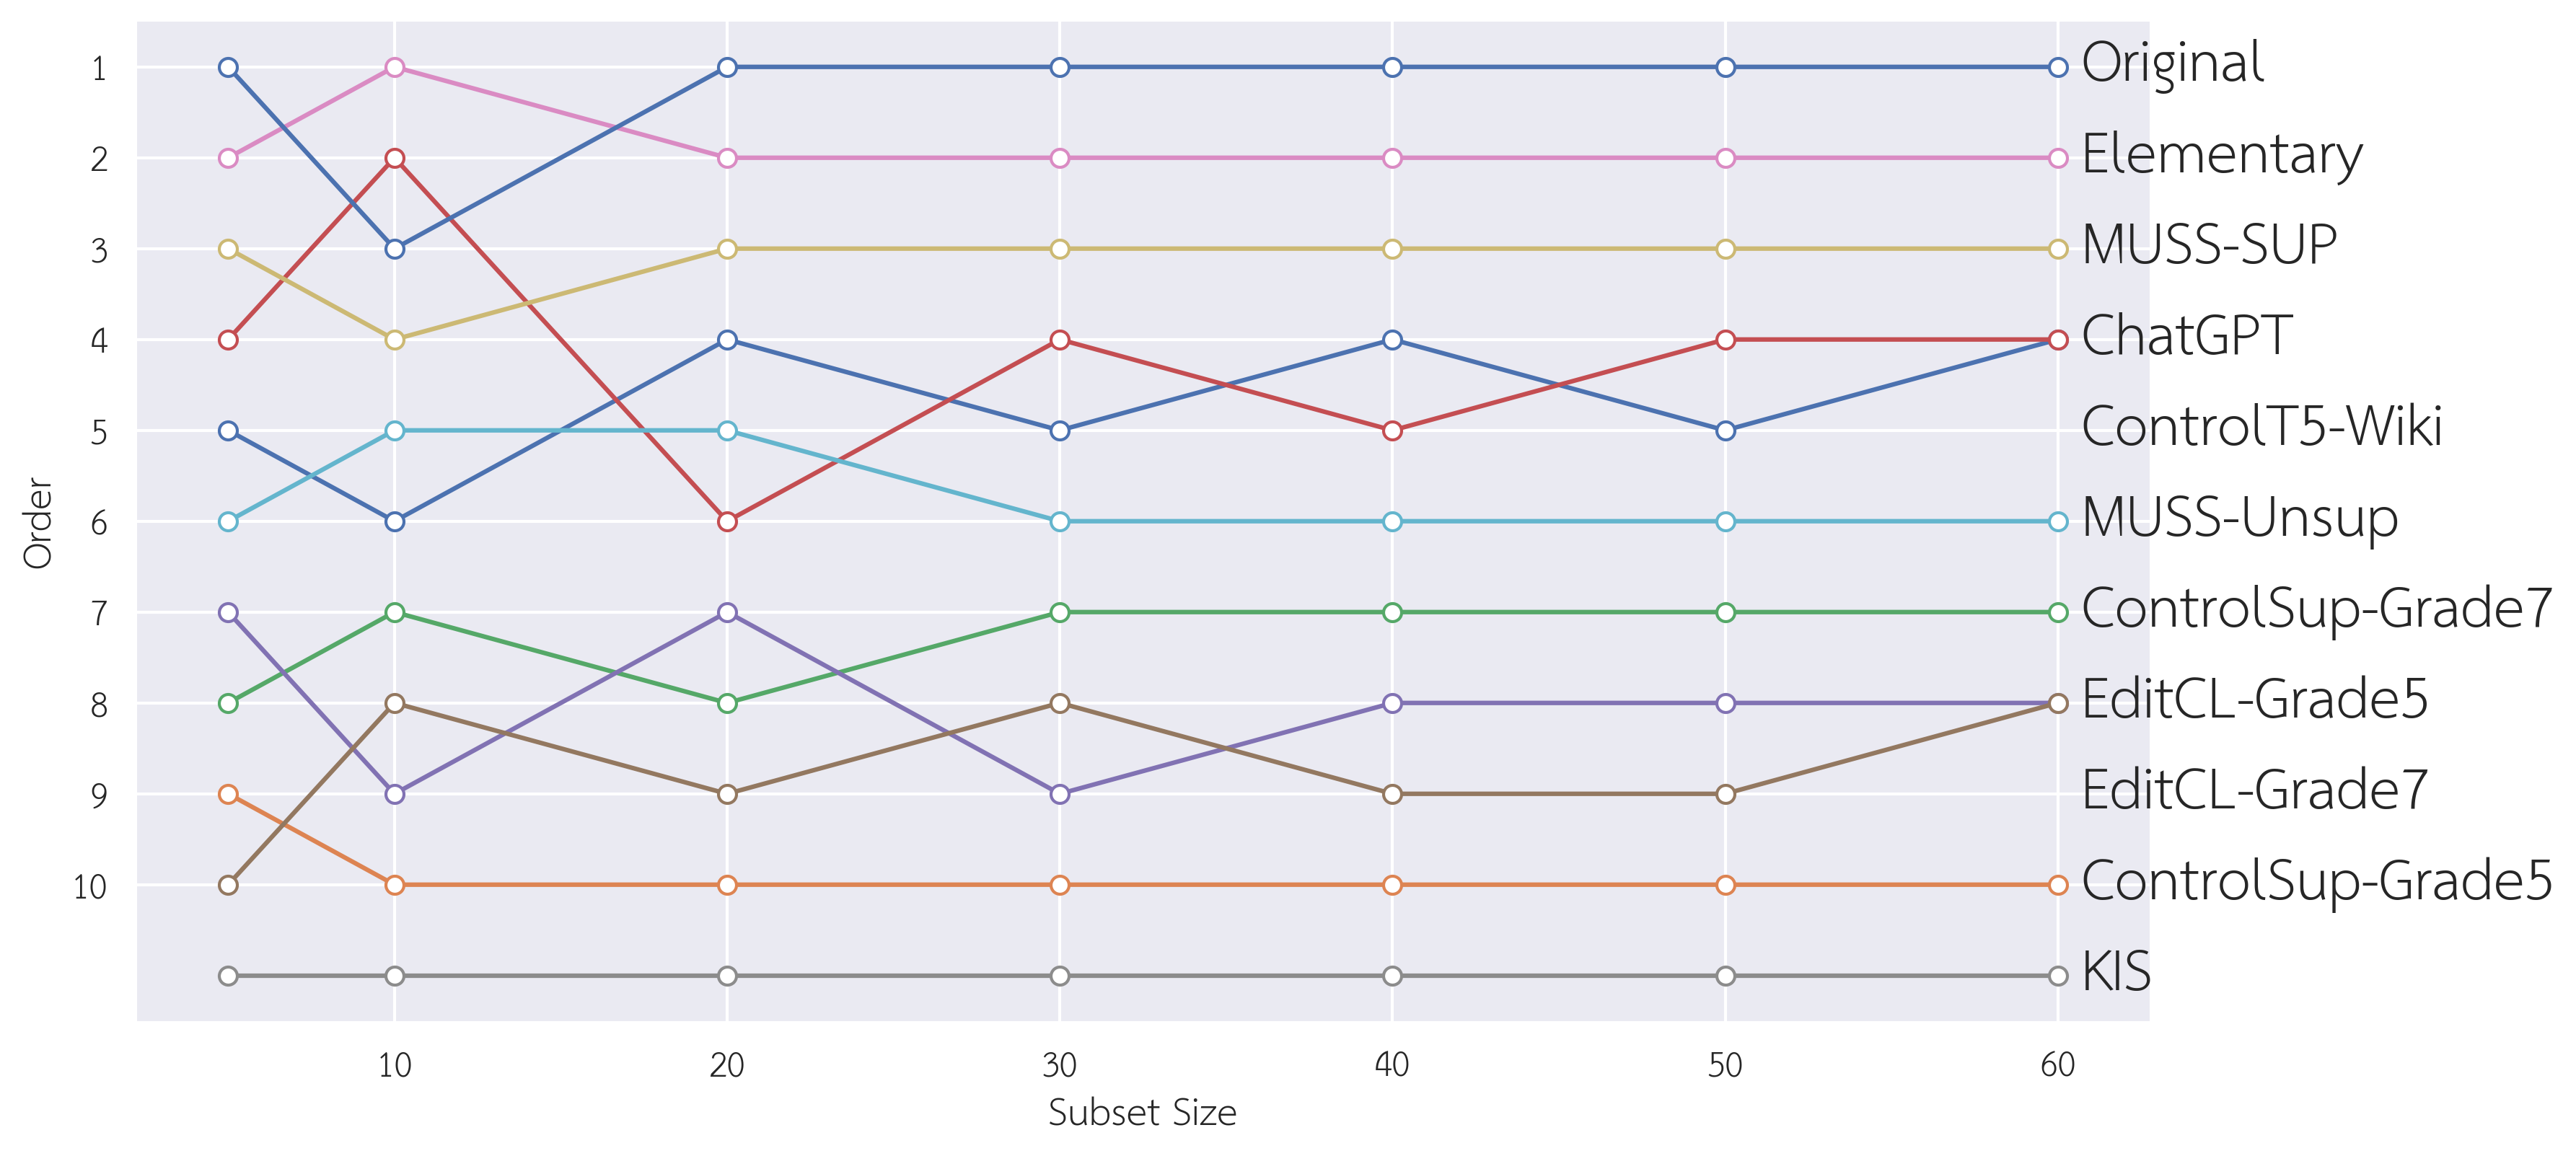

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

font = {'size'   : 18, 'weight' : 'bold'}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (12,6)

for element in new_ranking_list:
  ax.plot(element["Subset Size"],
          element["Rank"],
          "o-",                       # format of marker / format of line
          markerfacecolor="white")
  ax.annotate(element["Name"][0],
              xy=(60, element["Rank"][4]),
              xytext=(60.7,element["Rank"][4]),
              va="center")

plt.gca().invert_yaxis()
plt.yticks(np.arange(1, 11, 1))
for spine in ax.spines.values():
    spine.set_visible(False)

plt.xlabel("Subset Size")
plt.ylabel("Order")

# Answerability Analysis

In [34]:
def get_answered(item):
  ele_ans = all_datapoints_df[(all_datapoints_df.item_ids == item) & (all_datapoints_df.Model == "Elementary") ]["selected"].tolist()[0] != 4
  orig_ans = all_datapoints_df[(all_datapoints_df.item_ids == item) & (all_datapoints_df.Model == "Original") ]["selected"].tolist()[0] != 4
  # print(ele_ans, orig_ans, ele_ans | orig_ans)
  return ele_ans & orig_ans

all_datapoints_df["Answered (by human)"] = all_datapoints_df["item_ids"].apply(get_answered)

In [35]:
all_datapoints_df["Answered (by human)"].value_counts()

True     1495
False     485
Name: Answered (by human), dtype: int64

In [36]:
all_datapoints_df["correct"] = all_datapoints_df["selected"] == 0

In [37]:
all_datapoints_df["non_answer"] = all_datapoints_df["selected"] == 4

In [38]:
df1_grouped = all_datapoints_df.groupby(['Model'])

scores = []
for group_name, df_group in df1_grouped:
  scores.append((group_name, 100 - len(df_group[(df_group['selected']==4)]) / (len(df_group)) *100 , 100- len(df_group[(df_group["Answered (by human)"]==True) & (df_group['selected']==4)]) / (len(df_group)) *100 ))

scores_df = pd.DataFrame(scores)
scores_df.columns= ("Model", "All", "Subset")
print(scores_df.sort_values("All", ascending=False))
print("\n\n")

                Model        All      Subset
10           Original  87.777778  100.000000
8            MUSS-SUP  86.111111   91.666667
6          Elementary  85.555556  100.000000
0             ChatGPT  85.000000   91.111111
3      ControlT5-Wiki  85.000000   88.888889
9          MUSS-Unsup  83.888889   93.333333
5       EditCL-Grade7  83.333333   90.000000
1   ControlSup-Grade5  82.777778   86.111111
4       EditCL-Grade5  81.666667   88.888889
2   ControlSup-Grade7  80.000000   90.555556
7                 KIS  35.555556   53.333333





<ipython-input-38-f401469ada0f>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, df_group in df1_grouped:


In [39]:
scores_df_new = pd.melt(scores_df, id_vars=['Model'], var_name='Data Type', value_name='% Ans')

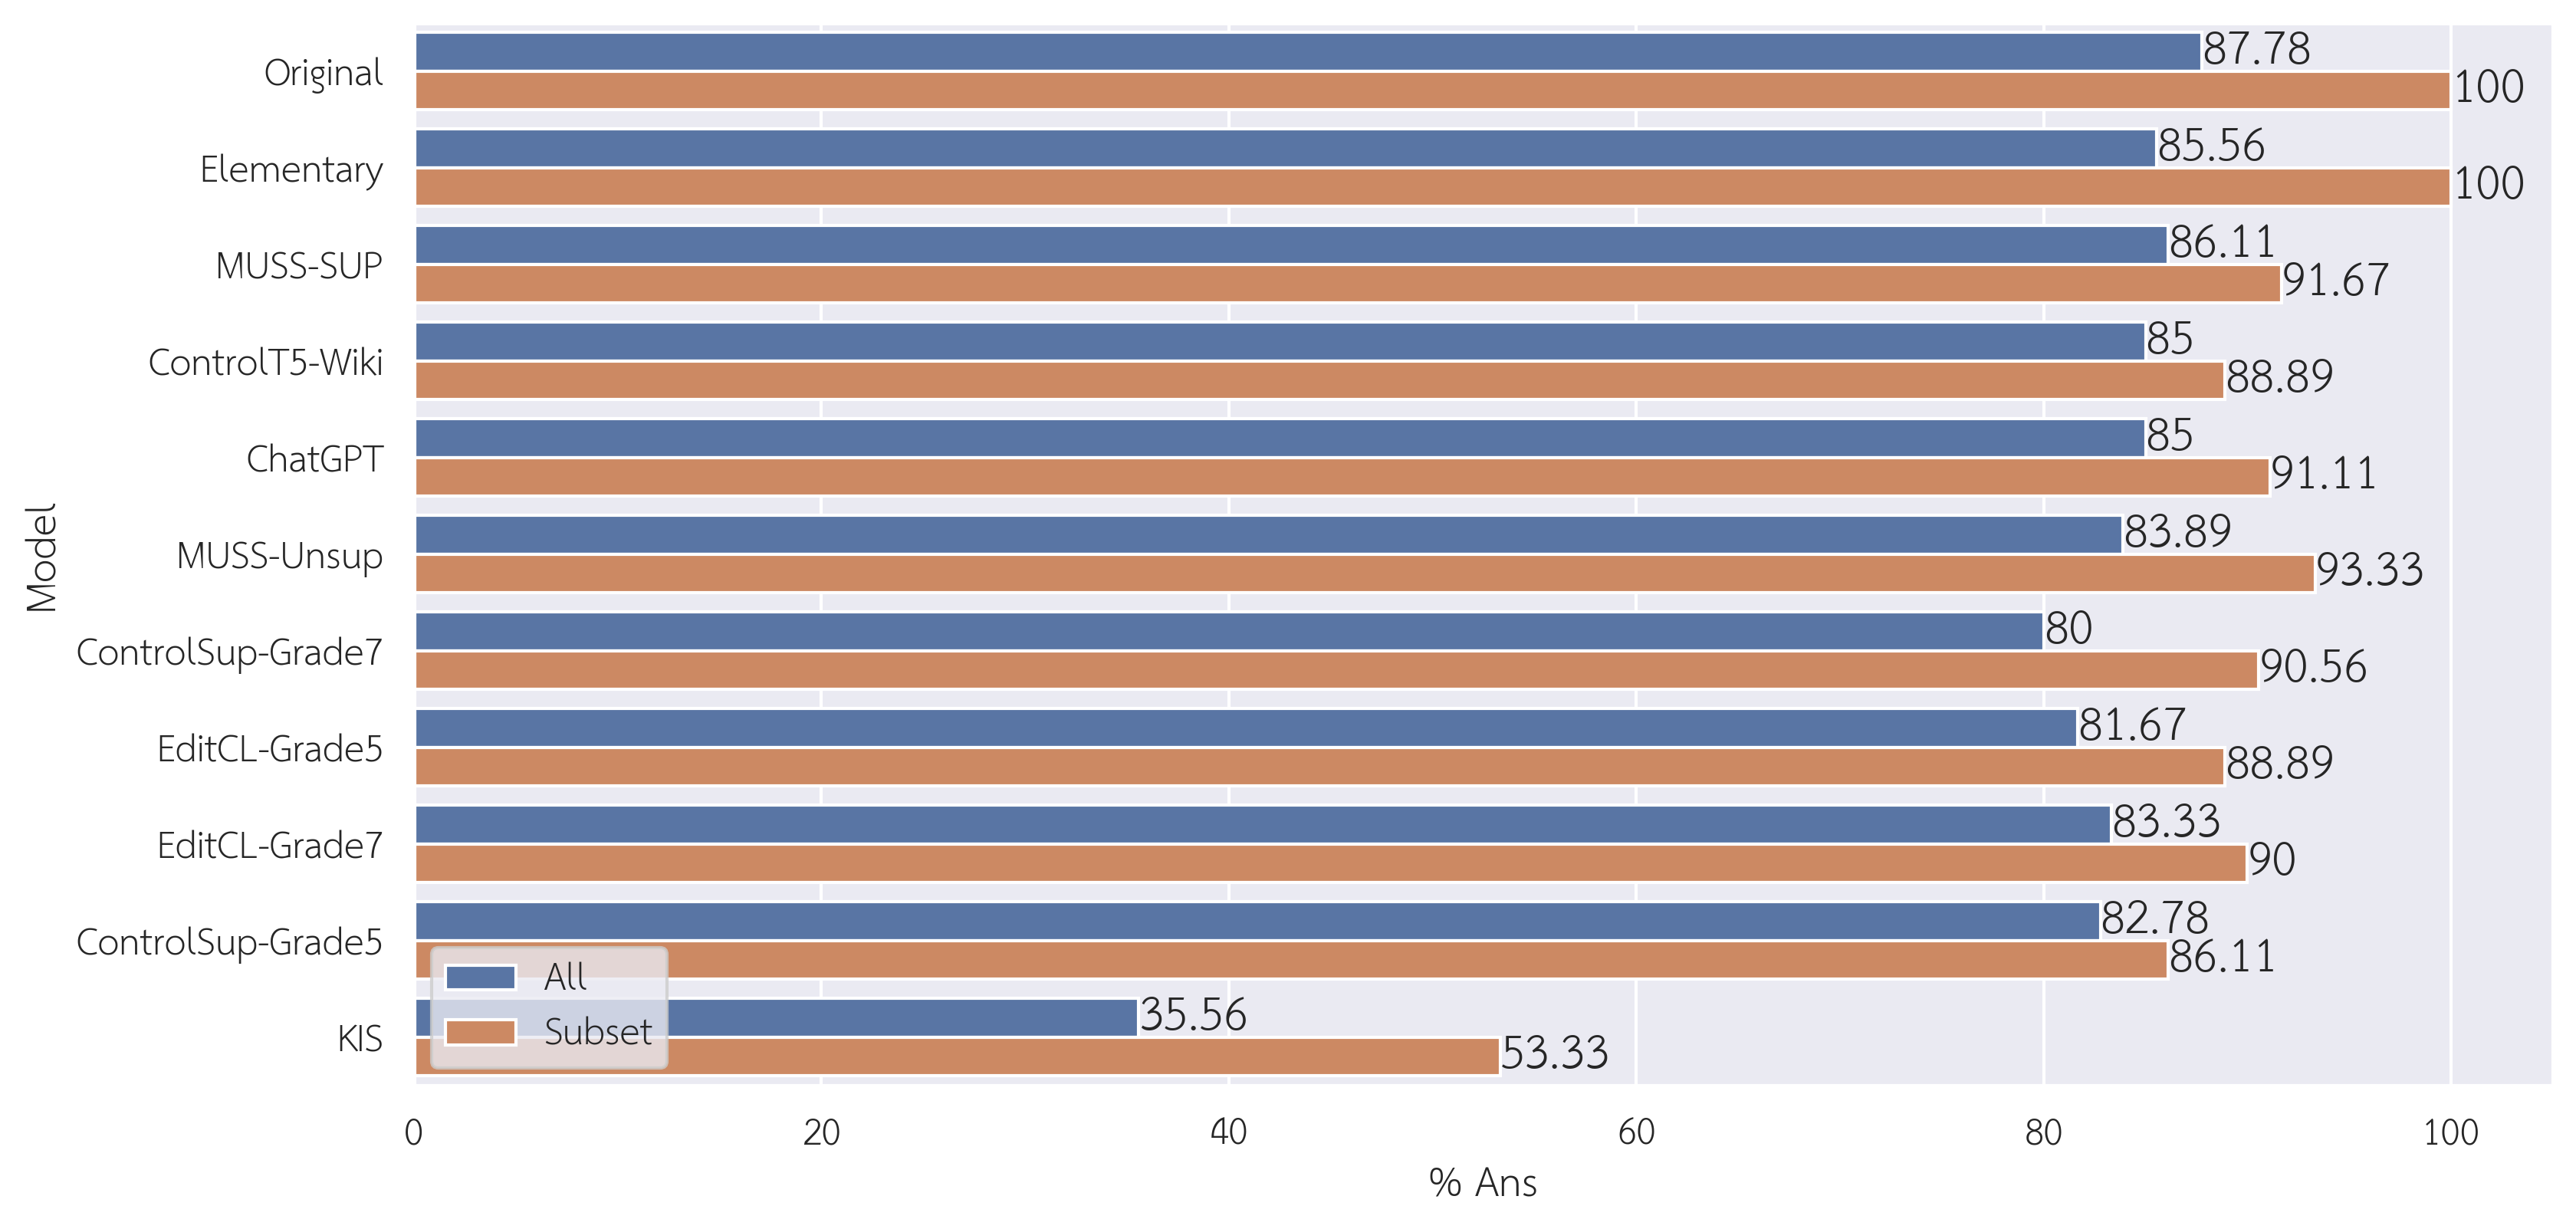

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 300
scores_df_new["% Ans"] = scores_df_new["% Ans"].apply(lambda x: round(x, 2))
ax = sns.barplot(data=scores_df_new, x="% Ans", y="Model", order=[
      'Original', 'Elementary', 'MUSS-SUP', 'ControlT5-Wiki', 'ChatGPT', 'MUSS-Unsup', 'ControlSup-Grade7', 'EditCL-Grade5',
       'EditCL-Grade7', 'ControlSup-Grade5', 'KIS'], hue="Data Type", orient="h")
for i in ax.containers:
  # print(i)
  ax.bar_label(i,)
plt.legend(loc='lower left')

# Support Analysis

In [42]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
stop_words = set(stopwords.words('english'))

def get_question_support(text, question):
  text_words = word_tokenize(text.lower())
  filtered_tokens = [w for w in text_words if not w.lower() in stop_words]
  question_words = word_tokenize(question.lower())
  support = len(set(filtered_tokens).intersection(set(text_words))) / len(filtered_tokens)
  return support

all_datapoints_df["Support(Q)"] = all_datapoints_df.apply(lambda x: get_question_support(x.paragraph, x.question), axis=1)
all_datapoints_df["question_length"] = all_datapoints_df.apply(lambda x: len(x.question), axis=1)

In [44]:
def get_answer_support(text, answer_options):
  text_words = word_tokenize(text.lower())
  answer_words = word_tokenize(answer_options[0].lower())
  support = len(set(answer_words).intersection(set(text_words))) / len(answer_words)
  return support

all_datapoints_df["Support(A)"] = all_datapoints_df.apply(lambda x: get_answer_support(x.paragraph, x.all_options), axis=1)
all_datapoints_df["answer_length"] = all_datapoints_df.apply(lambda x: len(x.all_options[0]), axis=1)

In [45]:
def get_label(selected):
  if selected == 0:
    return "Correct"
  elif selected == 4:
    return "UA"
  else:
    return "Incorrect"

In [46]:
len(all_datapoints_df)

1980

In [47]:
all_datapoints_df["Support(Q)*Support(A)"] = all_datapoints_df["Support(A)"] * all_datapoints_df["Support(Q)"]
all_datapoints_df["Category"] = all_datapoints_df["selected"].apply(get_label)

In [48]:
all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary"])][all_datapoints_df["Support(A)"]==1.0]["Category"].value_counts()

<ipython-input-48-11efbb1c95cf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary"])][all_datapoints_df["Support(A)"]==1.0]["Category"].value_counts()


Correct      160
Incorrect     23
UA            15
Name: Category, dtype: int64

In [49]:
len(all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary",])])

1620

<ipython-input-50-c8b2865d41c0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary",])][all_datapoints_df.Category.isin(["Correct", "UA"])]


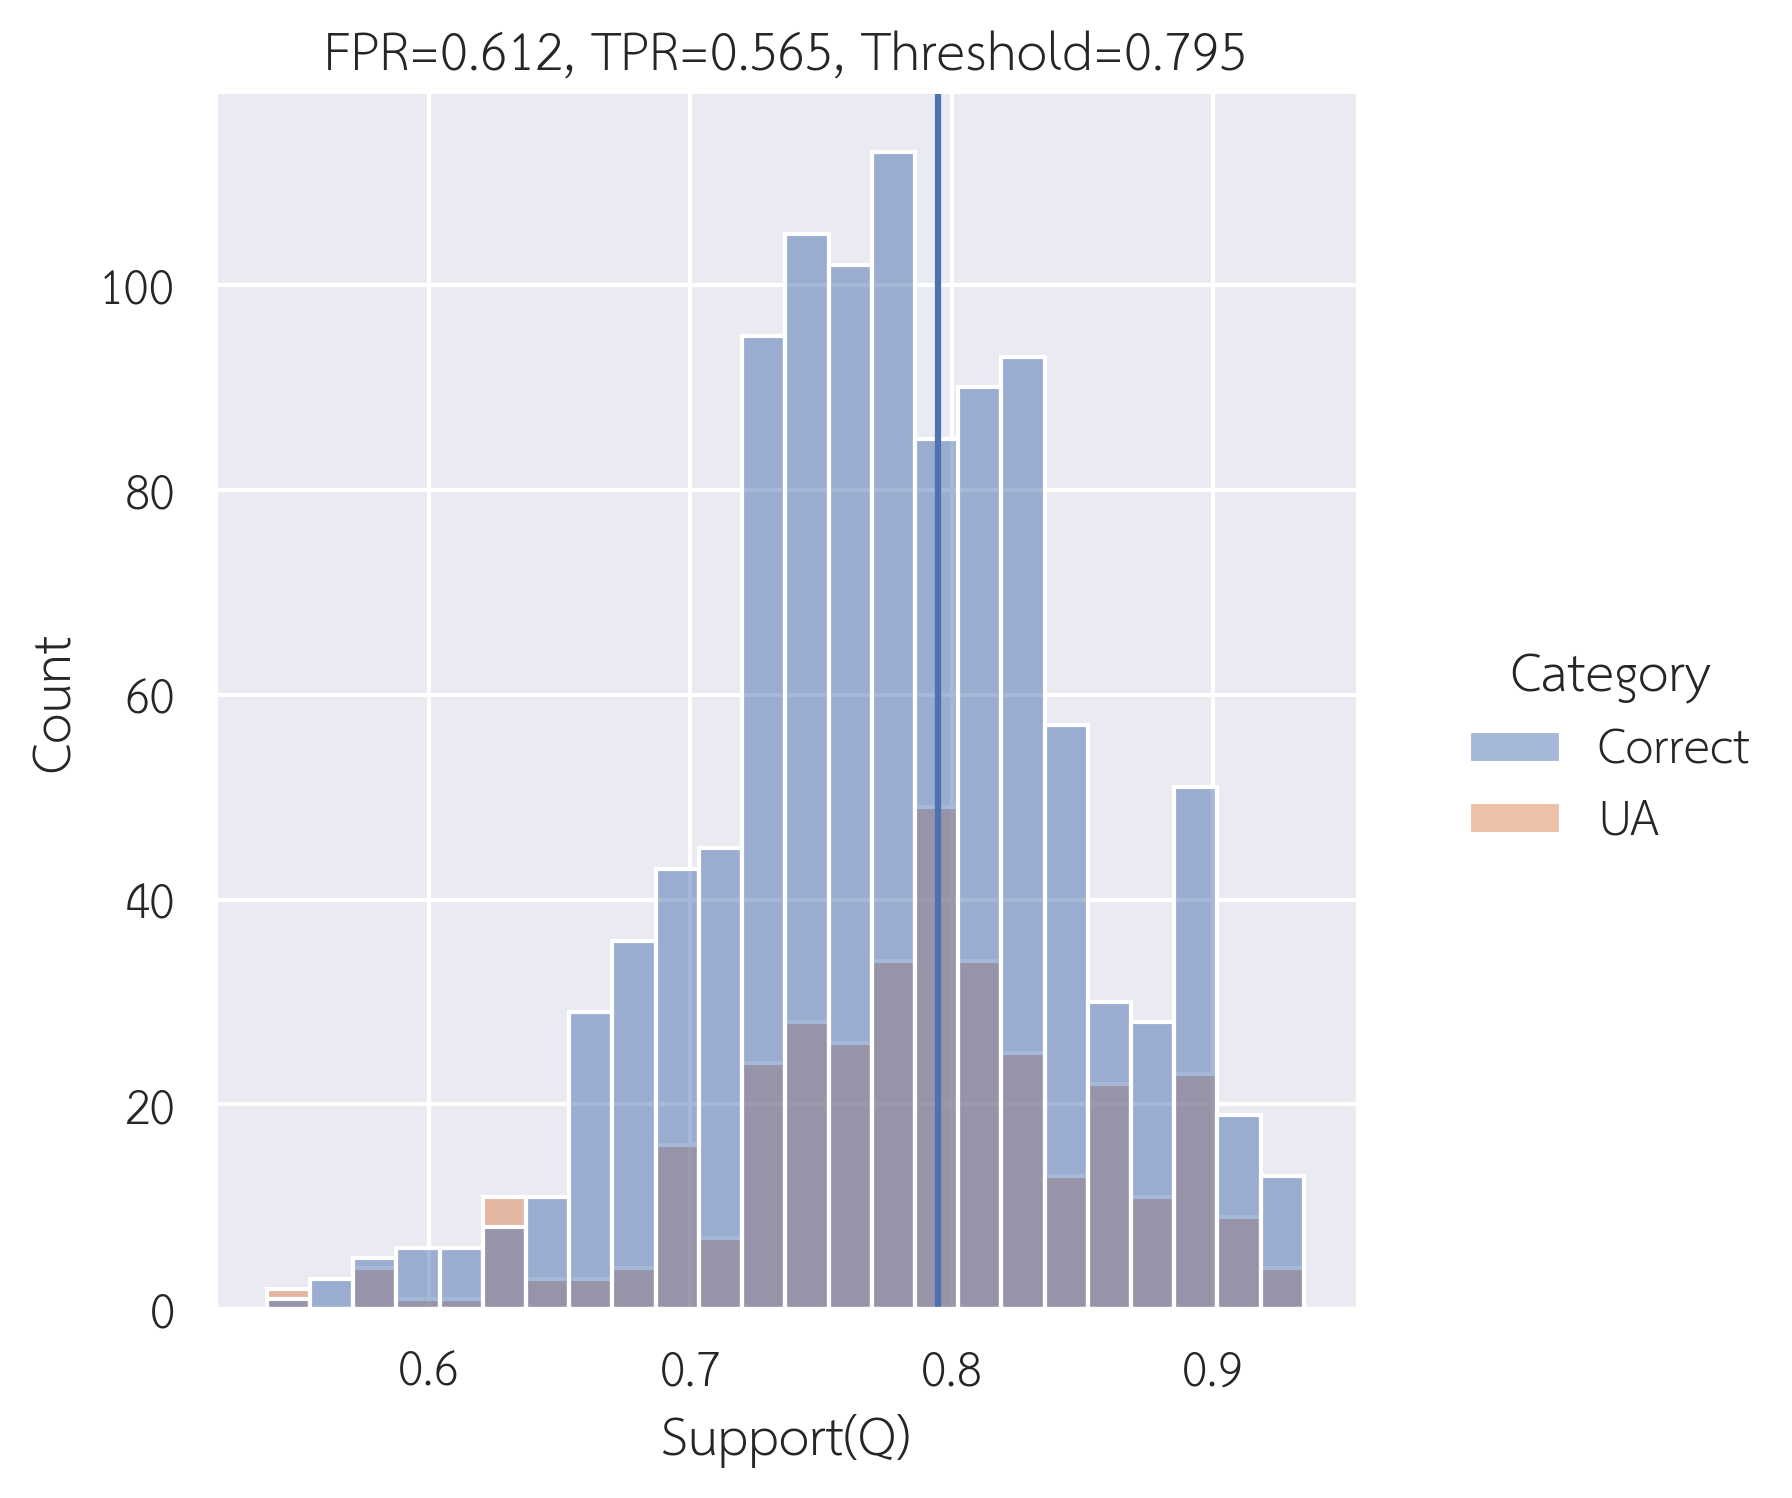

<ipython-input-50-c8b2865d41c0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary",])][all_datapoints_df.Category.isin(["Correct", "UA"])]


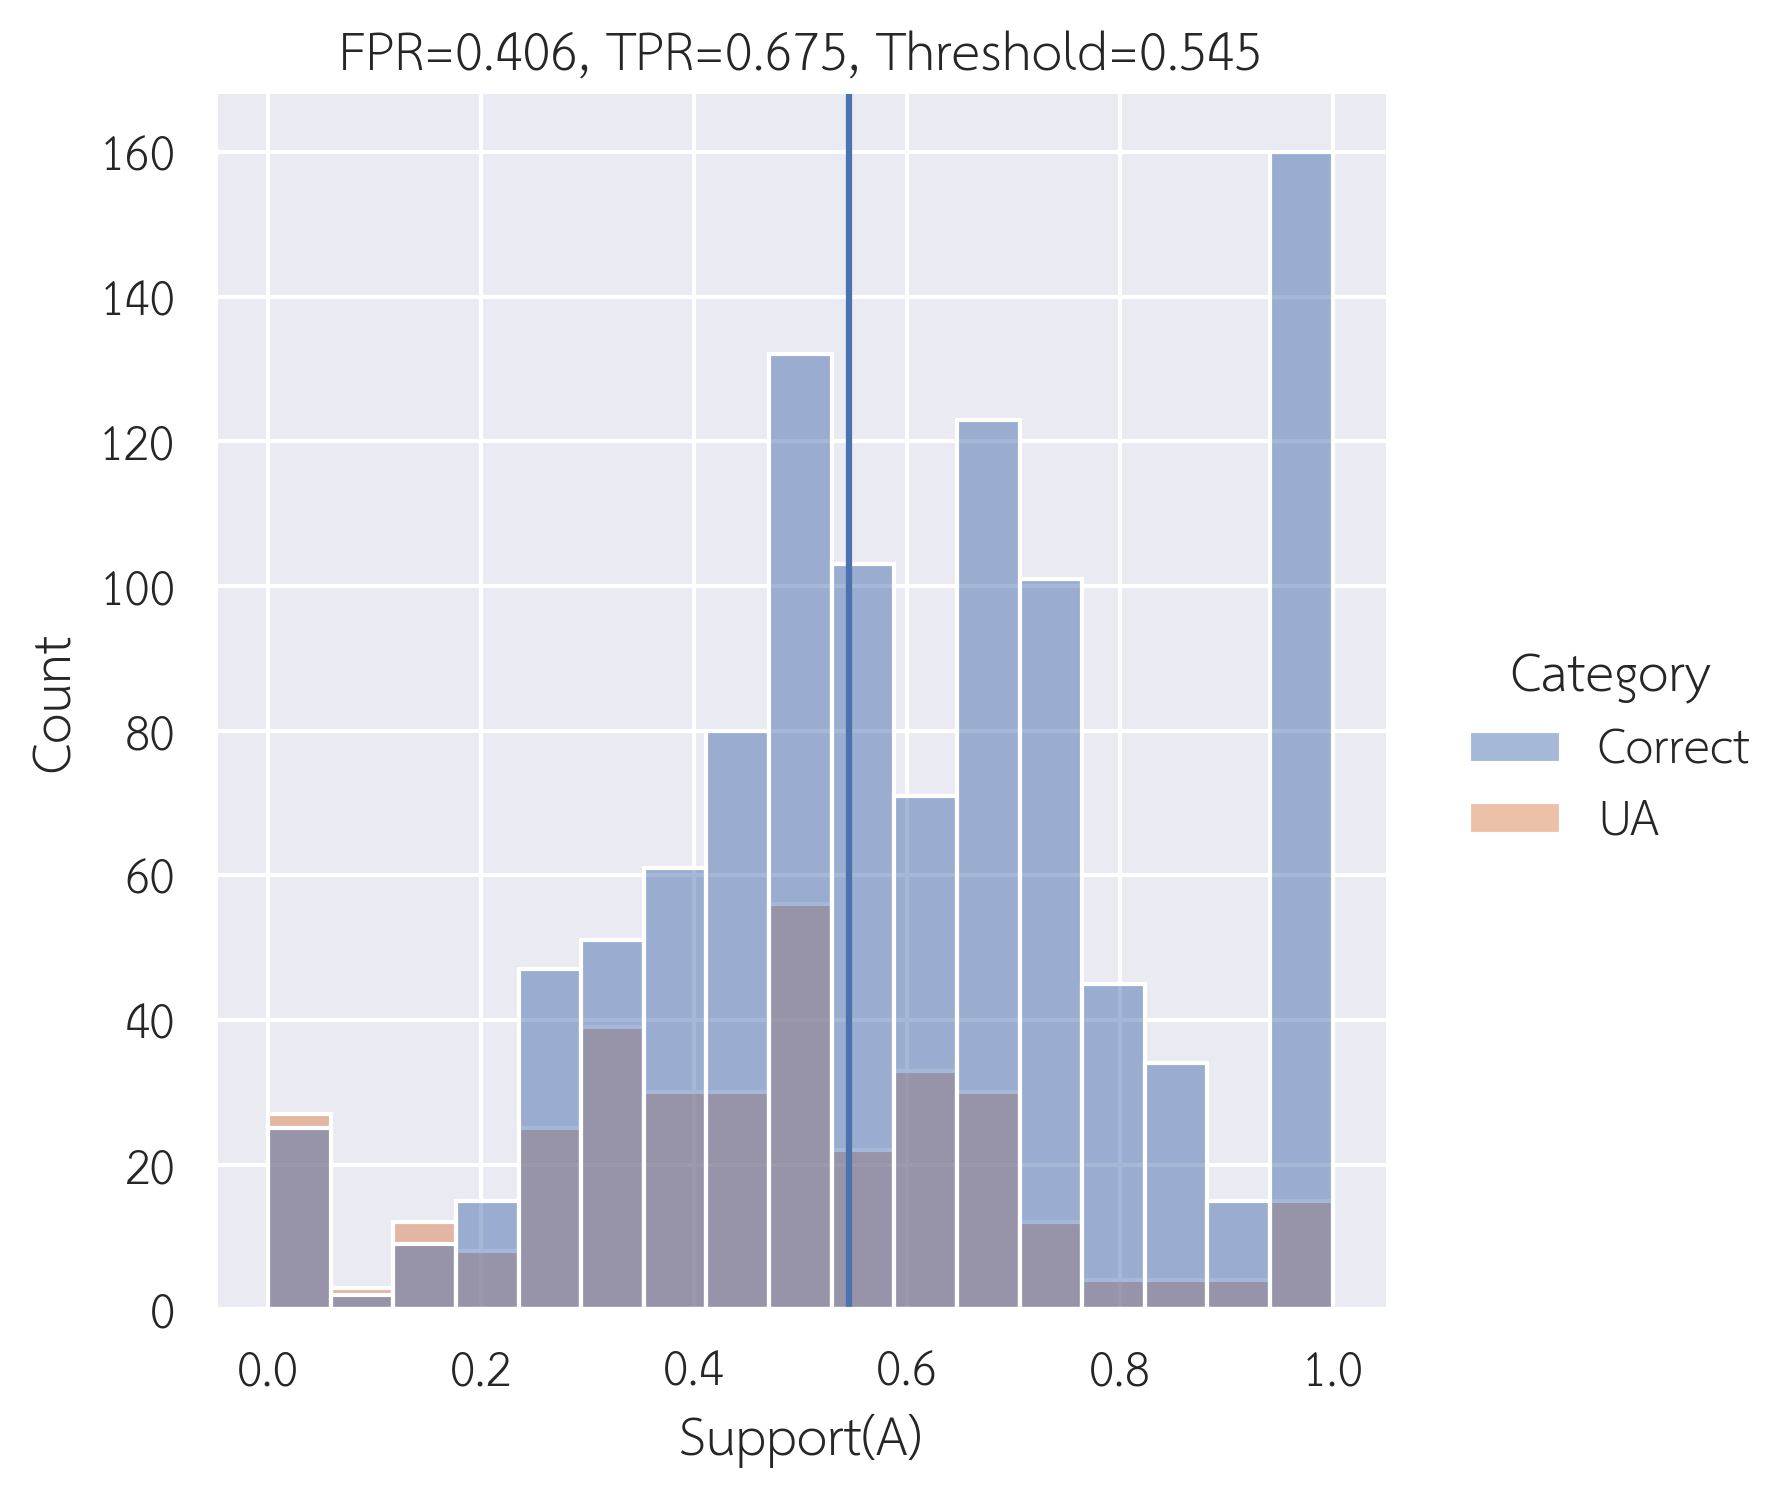

<ipython-input-50-c8b2865d41c0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary",])][all_datapoints_df.Category.isin(["Correct", "UA"])]


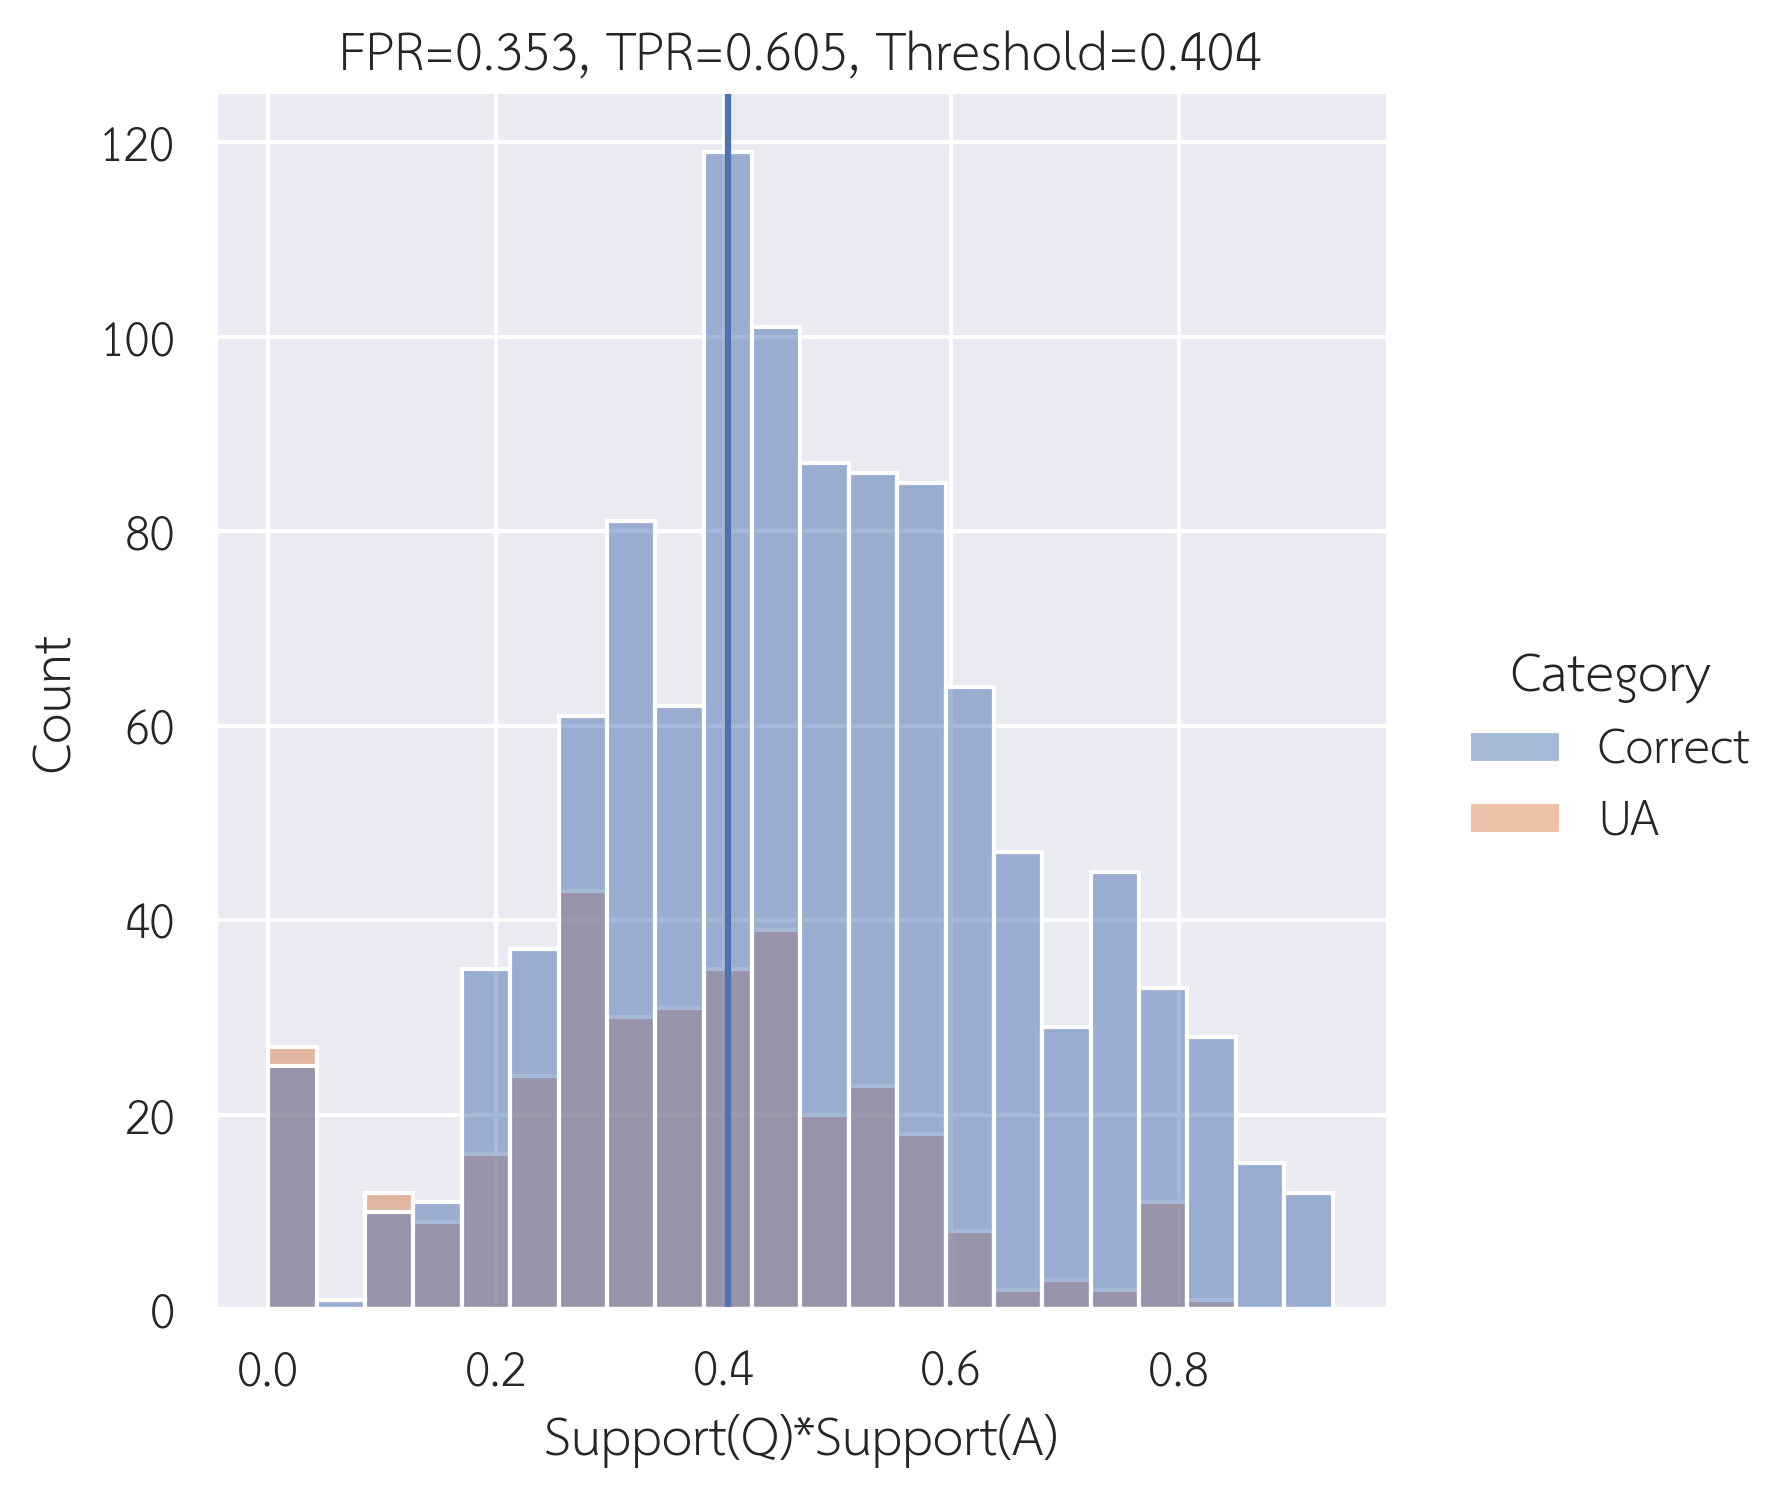

In [50]:
from sklearn.metrics import f1_score, matthews_corrcoef, roc_curve
import numpy as np

for column in ["Support(Q)", "Support(A)", "Support(Q)*Support(A)"]:
  subset_df = all_datapoints_df[~all_datapoints_df.Model.isin(["Original", "Elementary",])][all_datapoints_df.Category.isin(["Correct", "UA"])]
  testy = subset_df["Category"].replace("UA", True).replace("Correct", False)
  yhat = subset_df[column]

  # calculate roc curves
  fpr, tpr, thresholds = roc_curve(testy, -yhat)
  gmeans = np.sqrt(tpr * (1-fpr))
  ix = np.argmax(gmeans)

  sns.displot(data=subset_df, x=column, hue="Category")
  plt.axvline(x=-thresholds[ix])
  plt.title('FPR=%.3f, TPR=%.3f, Threshold=%.3f' % ( fpr[ix], tpr[ix], -thresholds[ix] ))
  plt.legend([],[], frameon=False)
  plt.show()

# Meta Evaluation - Automatic Metrics

In [7]:
model_names = ['Adv', 'Ele', 'MUSS-SUP', 'ControlT5-Wiki', 'ControlSup-Grade7', 'ControlSup-Grade5', 'EditCL-Grade7', 'EditCL-Grade5', 'MUSS-Unsup', 'KIS', 'ChatGPT']

In [8]:
!pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.7 MB/s eta 0:00:00


In [16]:
# from readability import Readability
import textstat
def get_flesh_reading(text):
  return textstat.flesch_kincaid_grade(text)

all_datapoints_df["fkgl"] = all_datapoints_df.paragraph.apply(get_flesh_reading)

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
def get_word_count(text):
  return len(nltk.word_tokenize(text))

def get_sent_count(text):
  return len(nltk.sent_tokenize(text))

all_datapoints_df["#(Words)"] = all_datapoints_df.paragraph.apply(get_word_count)
all_datapoints_df["#(Sents)"] = all_datapoints_df.paragraph.apply(get_sent_count)

In [19]:
import numpy as np
feats = []
for group_name, df_group in all_datapoints_df.groupby('Model'):
  feats.append((group_name, np.mean(df_group["#(Words)"] ),  np.mean(df_group["#(Sents)"] ), np.mean(df_group["fkgl"]) ))

feats_df = pd.DataFrame(feats)
feats_df.columns= ("Model", "#(Words)", "#(Sents)", "FKGL")

feats_df

,Model,#(Words),#(Sents),FKGL
0,ChatGPT,122.966667,5.116667,10.481667
1,ControlSup-Grade5,124.083333,7.300000,6.776667
2,ControlSup-Grade7,132.766667,5.850000,8.993333
3,ControlT5-Wiki,134.983333,7.650000,6.550000
4,EditCL-Grade5,130.950000,8.300000,6.140000
5,EditCL-Grade7,134.666667,6.083333,8.980000
6,Elementary,118.050000,5.700000,7.388333
7,KIS,73.600000,3.283333,9.086667
8,MUSS-SUP,126.766667,7.316667,7.031667
9,MUSS-Unsup,124.650000,5.683333,9.093333


In [22]:
pip install scikit-learn

In [20]:
! pip install python_Levenshtein==0.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: Insecure, upgrade to 0.12.1
  Created wheel for python_Levenshtein: filename=python_Levenshtein-0.12.0-cp310-cp310-linux_x86_64.whl size=155435 sha256=930a588a187e9b79ec764abc624d3cbe7ad396898d91f698b70996ad5fb75a55
  Stored in directory: /root/.cache/pip/wheels/64/9d/d4/b0f4b842be0e66baad0fdf1b91dd90b36b4135feefc8dfae55
Successfully built python_Levenshtein


In [21]:
! pip install -q py-readability-metrics bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.0 MB/s eta 0:00:00


In [23]:
import Levenshtein

all_datapoints_df["levsim_orig"] = all_datapoints_df.apply(lambda x: Levenshtein.ratio(x.original, x.paragraph), axis=1)
all_datapoints_df["levsim_simp"] = all_datapoints_df.apply(lambda x: Levenshtein.ratio(x.simplified, x.paragraph), axis=1)

In [24]:
from bert_score import score

all_bertscore_ref = score(all_datapoints_df.paragraph.to_list(), all_datapoints_df.simplified.to_list(), lang="en", verbose=False)
all_datapoints_df["bert_scores_ref_p"], all_datapoints_df["bert_scores_ref_r"], all_datapoints_df["bert_scores_ref_f1"]  = all_bertscore_ref[0].numpy(), all_bertscore_ref[1].numpy(), all_bertscore_ref[2].numpy()
all_bertscore_src = score(all_datapoints_df.paragraph.to_list(), all_datapoints_df.original.to_list(), lang="en", verbose=False)
all_datapoints_df["bert_scores_src_p"], all_datapoints_df["bert_scores_src_r"], all_datapoints_df["bert_scores_src_f1"] = all_bertscore_src[0].numpy(), all_bertscore_src[1].numpy(), all_bertscore_src[2].numpy()

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
! git clone https://github.com/feralvam/easse.git


Cloning into 'easse'...
remote: Enumerating objects: 1964, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 1964 (delta 118), reused 104 (delta 104), pack-reused 1819
Receiving objects: 100% (1964/1964), 33.15 MiB | 20.98 MiB/s, done.
Resolving deltas: 100% (1231/1231), done.


In [26]:
%cd easse

/content/easse


In [27]:
pip install scikit-learn

In [ ]:
pip install -e .

In [61]:
from easse.sari import corpus_sari

sari_scores = {}
for group_name, df_group in all_datapoints_df.groupby(['Model']):
  if group_name in model_names:
    sari_scores[group_name] = corpus_sari(orig_sents=df_group['original'], sys_sents=df_group['paragraph'], refs_sents=[df_group['simplified']])


<ipython-input-61-9d8162a76e65>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, df_group in all_datapoints_df.groupby(['Model']):


In [34]:
# Table 1
sari_scores

{'ChatGPT': 41.41050835523493,
 'ControlSup-Grade5': 38.34684269190504,
 'ControlSup-Grade7': 29.269350625861005,
 'ControlT5-Wiki': 44.76140461903943,
 'EditCL-Grade5': 39.68979919372169,
 'EditCL-Grade7': 30.48859886920096,
 'MUSS-SUP': 45.06702453685711,
 'MUSS-Unsup': 40.66978605976855}

In [36]:
# Table 1
{x: all_datapoints_df[all_datapoints_df.Model == x]["bert_scores_ref_f1"].mean() for x in model_names}

{'MUSS-SUP': 0.94031125,
 'ControlT5-Wiki': 0.93825406,
 'ControlSup-Grade7': 0.9463537,
 'ControlSup-Grade5': 0.9391789,
 'EditCL-Grade7': 0.93999153,
 'EditCL-Grade5': 0.92949134,
 'MUSS-Unsup': 0.93747115,
 'ChatGPT': 0.92724526}

In [38]:
# bertscore significance testing
from scipy.stats import ttest_ind
import itertools
for pair in [("ControlSup-Grade7", "MUSS-SUP"), ("MUSS-SUP", "EditCL-Grade7"), ("EditCL-Grade7", "ControlSup-Grade5"), ("ControlSup-Grade5", "ControlT5-Wiki"),
             ("ControlT5-Wiki", "EditCL-Grade5"), ("EditCL-Grade5", "ChatGPT"), ("ChatGPT", "KIS")]:
  cat1 = all_datapoints_df[all_datapoints_df['Model']==pair[0]]
  cat2 = all_datapoints_df[all_datapoints_df['Model']==pair[1]]

  print(pair, ttest_ind(cat1['bert_scores_ref_f1'], cat2['bert_scores_ref_f1']).pvalue)

('ControlSup-Grade7', 'MUSS-SUP') 0.00022640289943283315
('MUSS-SUP', 'EditCL-Grade7') 0.8398331302326142
('EditCL-Grade7', 'ControlSup-Grade5') 0.6439709036629162
('ControlSup-Grade5', 'ControlT5-Wiki') 0.5654436773283825
('ControlT5-Wiki', 'EditCL-Grade5') 6.304667317065186e-08
('EditCL-Grade5', 'ChatGPT') 0.1810352967444259
('ChatGPT', 'KIS') 1.2320038096765029e-53


In [70]:
from easse.sari import get_corpus_sari_operation_scores

sari_scores_sub = {}
for group_name, df_group in all_datapoints_df.groupby(['Model']):
  if group_name in model_names:
    sari_scores_sub[group_name] = get_corpus_sari_operation_scores(orig_sents=df_group['original'], sys_sents=df_group['paragraph'], refs_sents=[df_group['simplified']])


<ipython-input-70-9203f70cd2a3>:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, df_group in all_datapoints_df.groupby(['Model']):


In [31]:
from scipy.stats import spearmanr
from sklearn.metrics import label_ranking_average_precision_score

def compute_correlation(metric_scores, human_scores):
  return spearmanr(metric_scores, human_scores)

In [59]:
human_scores = [scores_df[scores_df.Model==model_name]["% Correct"].tolist()[0] for model_name in model_names]
for i in range(3):
  # add, keep, del
  metric_scores = [sari_scores_sub[x][i] for x in model_names]
  print(compute_correlation(metric_scores, human_scores))

SignificanceResult(statistic=0.6861984751796929, pvalue=0.04124246780258141)
SignificanceResult(statistic=-0.1338923854009157, pvalue=0.731278765094574)
SignificanceResult(statistic=0.30125786715206027, pvalue=0.43082315771331503)


In [49]:
from sacrebleu import corpus_bleu
bleu_scores = {}
for group_name, df_group in all_datapoints_df.groupby(['Model']):
  if group_name in model_names:
    bleu_scores[group_name] = corpus_bleu(df_group['simplified'].tolist(), df_group['paragraph'].tolist()).score

<ipython-input-49-1cf53e7ac121>:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, df_group in all_datapoints_df.groupby(['Model']):


In [51]:
for col_name in ['bert_scores_ref_p', 'bert_scores_ref_r', 'bert_scores_ref_f1','bert_scores_src_p', 'bert_scores_src_r', 'bert_scores_src_f1']:
  metric_scores = [all_datapoints_df[all_datapoints_df.Model == x][col_name].mean() for x in model_names]
  print(col_name, compute_correlation(metric_scores, human_scores))

bert_scores_ref_p SignificanceResult(statistic=0.4184137043778615, pvalue=0.2623814171891539)
bert_scores_ref_r SignificanceResult(statistic=0.2928895930645031, pvalue=0.4443546956852248)
bert_scores_ref_f1 SignificanceResult(statistic=0.3096261412396175, pvalue=0.4174779170120546)
bert_scores_src_p SignificanceResult(statistic=0.08368274087557231, pvalue=0.8305146353314997)
bert_scores_src_r SignificanceResult(statistic=0.03347309635022892, pvalue=0.9318728062136596)
bert_scores_src_f1 SignificanceResult(statistic=0.03347309635022892, pvalue=0.9318728062136596)


In [52]:
for col_name in ["fkgl", "levsim_orig", "levsim_simp"]:
  metric_scores = [all_datapoints_df[all_datapoints_df.Model == x][col_name].mean() for x in model_names]
  print(col_name, compute_correlation(metric_scores, human_scores))

fkgl SignificanceResult(statistic=0.12552411131335847, pvalue=0.747618228942804)
levsim_orig SignificanceResult(statistic=-0.15899720766358738, pvalue=0.6828398157150526)
levsim_simp SignificanceResult(statistic=-0.1422606594884729, pvalue=0.7150322450059001)


In [54]:
metric_scores = [bleu_scores[x] for x in model_names]
print(compute_correlation(metric_scores, human_scores))

SignificanceResult(statistic=-0.19327731092436976, pvalue=0.6183107741843601)


In [62]:
metric_scores = [sari_scores[x] for x in model_names]
print(compute_correlation(metric_scores, human_scores))

SignificanceResult(statistic=0.728039845617479, pvalue=0.026153620753162264)


## ALL - KIS

In [63]:
model_names = ['MUSS-SUP', 'ControlT5-Wiki', 'ControlSup-Grade7', 'ControlSup-Grade5', 'EditCL-Grade7', 'EditCL-Grade5', 'MUSS-Unsup', 'ChatGPT']
human_scores = [scores_df[scores_df.Model==model_name]["% Correct"].tolist()[0] for model_name in model_names]

In [64]:
for col_name in ['bert_scores_ref_p', 'bert_scores_ref_r', 'bert_scores_ref_f1','bert_scores_src_p', 'bert_scores_src_r', 'bert_scores_src_f1']:
  metric_scores = [all_datapoints_df[all_datapoints_df.Model == x][col_name].mean() for x in model_names]
  print(col_name, compute_correlation(metric_scores, human_scores))

bert_scores_ref_p SignificanceResult(statistic=0.16766767666785626, pvalue=0.691465351646736)
bert_scores_ref_r SignificanceResult(statistic=-0.011976262619132589, pvalue=0.9775466547038871)
bert_scores_ref_f1 SignificanceResult(statistic=0.011976262619132589, pvalue=0.9775466547038871)
bert_scores_src_p SignificanceResult(statistic=-0.3113828280974473, pvalue=0.45279875742633724)
bert_scores_src_r SignificanceResult(statistic=-0.38324040381224284, pvalue=0.348683741124201)
bert_scores_src_f1 SignificanceResult(statistic=-0.38324040381224284, pvalue=0.348683741124201)


In [67]:
for col_name in ["fkgl", "levsim_orig", "levsim_simp"]:
  metric_scores = [all_datapoints_df[all_datapoints_df.Model == x][col_name].mean() for x in model_names]
  print(col_name, compute_correlation(metric_scores, human_scores))

fkgl SignificanceResult(statistic=0.3353353533357125, pvalue=0.41679159096427404)
levsim_orig SignificanceResult(statistic=-0.6586944440522925, pvalue=0.0756896878416385)
levsim_simp SignificanceResult(statistic=-0.6347419188140272, pvalue=0.09089043638915881)


In [68]:
metric_scores = [sari_scores[x] for x in model_names]
print(compute_correlation(metric_scores, human_scores))

SignificanceResult(statistic=0.7784570702436182, pvalue=0.022867333969736846)


In [69]:
metric_scores = [bleu_scores[x] for x in model_names]
print(compute_correlation(metric_scores, human_scores))

SignificanceResult(statistic=0.15662650602409636, pvalue=0.7110928786626384)


In [71]:
for i in range(3):
  # add, keep, del
  metric_scores = [sari_scores_sub[x][i] for x in model_names]
  print(compute_correlation(metric_scores, human_scores))

SignificanceResult(statistic=0.7185757571479554, pvalue=0.04462261002441918)
SignificanceResult(statistic=-0.6227656561948945, pvalue=0.09910080782353467)
SignificanceResult(statistic=0.7065994945288228, pvalue=0.05006339467042151)


# Model-based Q/A

In [ ]:
! pip install sentencepiece transformers datasets

In [11]:
import string
import ast
# https://github.com/allenai/unifiedqa/blob/7bf0653c6fb68a51019924fd4c51615155acbebe/encode_datasets.py#L336
def get_prompt(row):
  return  row["question"] + "\n" + row["paragraph"] + "\n" + (" ").join(["(" + i + ") " + ans for i, ans in zip(string.ascii_uppercase, row['all_options'])])


In [12]:
all_datapoints_df["prompts"] = all_datapoints_df.apply(get_prompt, axis=1)

In [ ]:
all_datapoints_df.head()

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_name = "allenai/unifiedqa-v2-t5-3b-1363200" # you can specify the model size here
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
def run_model(input_string):
    input_ids = tokenizer.encode(input_string, return_tensors="pt").to(device)
    res = model.generate(input_ids, temperature=1.0)
    return tokenizer.batch_decode(res, skip_special_tokens=True)[0]

In [ ]:
run_model(all_datapoints_df.prompts[0])

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
all_datapoints_df["model_answer"] = all_datapoints_df["prompts"].progress_apply(run_model)

In [ ]:
all_datapoints_df["answer_lc"] = all_datapoints_df["answer"].apply(lambda x: x.lower())
all_datapoints_df["model_answer_lc"] = all_datapoints_df["model_answer"].apply(lambda x: x.lower())

In [ ]:
all_datapoints_df["model_is_correct"] = all_datapoints_df["model_answer_lc"] == all_datapoints_df["answer_lc"]

In [ ]:
import re
def replace_punctuation(str):
    return str.replace("\"", "").replace("'", "")


# Temporary fix for bug where {}^<\` characters roundtrip into \u2047 (??) character
def fix_buggy_characters(str):
    return re.sub("[{}^\\\\`\u2047<]", " ", str)


def score_string_similarity(str1, str2):
    if str1 == str2:
        return 3.0  # Better than perfect token match
    str1 = fix_buggy_characters(replace_punctuation(str1))
    str2 = fix_buggy_characters(replace_punctuation(str2))
    if str1 == str2:
        return 2.0
    if " " in str1 or " " in str2:
        str1_split = str1.split(" ")
        str2_split = str2.split(" ")
        overlap = list(set(str1_split) & set(str2_split))
        return len(overlap) / max(len(str1_split), len(str2_split))
    else:
        if str1 == str2:
            return 1.0
        else:
            return 0.0

In [ ]:
all_datapoints_df["match_answer"] = all_datapoints_df.apply(lambda x: np.argmax([score_string_similarity(x.model_answer_lc, y) for y in ast.literal_eval(x.all_options)]), axis=1)

In [ ]:
# validate
scores = []
for group_name, df_group in all_datapoints_df.groupby("Model"):
  scores.append((group_name, len(df_group[df_group.selected == 4]) / len(df_group), len(df_group[df_group.selected == 0]) / len(df_group), len(df_group[df_group.model_is_correct]) / len(df_group), len(df_group[df_group.match_answer==df_group.selected]) / len(df_group)))

scores_df = pd.DataFrame(scores)
scores_df.columns= ("Model", "%N/A", "% Correct", "% Model Correct", "% Model Matched Accuracy")
print(scores_df.sort_values("% Correct", ascending=False))
print("\n\n")

In [ ]:
scores_df["Group"] = ["Group 1", "Group 1", "Group 3", "Group 4", "Group 4", "Group 5", "Group 4", "Group 6", "Group 2", "Group 3", "Group 3" ]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 24}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 300
sns.set_theme()
subset_df = scores_df

ax = sns.scatterplot(data=subset_df, x="% Correct", y="% Model Correct", hue="Group")
plt.legend([],[], frameon=False)
plt.title("All Systems (Spearman Correlation): 0.838")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
font = {'size'   : 24}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.dpi'] = 300
sns.set_theme()
subset_df = scores_df[~scores_df["Model_name"].isin(["KIS"])]

ax = sns.scatterplot(data=subset_df, x="% Correct", y="% Model Correct", hue="Group")
for i, item in enumerate(subset_df.values):
  ax.annotate(item[5], (item[2], item[3]), fontsize=10.5)
plt.legend([],[], frameon=False)
plt.title("All Systems except Keep-it-Simple (Spearman Correlation): 0.784")